In [52]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [54]:
df=pd.read_csv("D:\\Sajith\\nutrition.dat", sep='\t')

In [55]:
df.head()

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
0,GELATIN; DRY 1 ENVELP,7.00,13,25,6,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,3.571429,0.000000,0.857143,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,5,80,16,2,0.8,0.2,0.6,0,...,160,16,0.67,1.04,3.6,3,2.821869,0.285714,0.564374,0.070547
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,5,20,3,0,0.0,0.1,0.0,0,...,0,0,0.16,0.38,2.6,0,2.857143,0.157143,0.428571,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,18,130,12,9,5.4,2.5,0.2,22,...,200,49,0.01,0.11,0.1,0,4.585538,0.010582,0.423280,0.317460
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,18,455,42,30,19.1,8.7,0.7,79,...,700,173,0.05,0.39,0.3,0,4.550000,0.010000,0.420000,0.300000


In [56]:
df

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
0,GELATIN; DRY 1 ENVELP,7.00,13,25,6,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,3.571429,0.000000,0.857143,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,5,80,16,2,0.8,0.2,0.6,0,...,160,16,0.67,1.04,3.6,3,2.821869,0.285714,0.564374,0.070547
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,5,20,3,0,0.0,0.1,0.0,0,...,0,0,0.16,0.38,2.6,0,2.857143,0.157143,0.428571,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,18,130,12,9,5.4,2.5,0.2,22,...,200,49,0.01,0.11,0.1,0,4.585538,0.010582,0.423280,0.317460
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,18,455,42,30,19.1,8.7,0.7,79,...,700,173,0.05,0.39,0.3,0,4.550000,0.010000,0.420000,0.300000
5,PARMESAN CHEESE; GRATED 1 TBSP,5.00,18,25,2,2,1.0,0.4,0.0,4,...,40,9,0.00,0.02,0.0,0,5.000000,0.000000,0.400000,0.400000
6,YEAST; BREWERS; DRY 1 TBSP,8.00,5,25,3,0,0.0,0.0,0.0,0,...,0,0,1.25,0.34,3.0,0,3.125000,0.175000,0.375000,0.000000
7,LAMB;CHOPS;ARM;BRAISED;LEAN 1.7 OZ,48.00,49,135,17,7,2.9,2.6,0.4,59,...,0,0,0.03,0.13,3.0,0,2.812500,0.027083,0.354167,0.145833
8,TUNA; CANND; DRND;WATR; WHITE 3 OZ,85.00,63,135,30,1,0.3,0.2,0.3,48,...,110,32,0.03,0.10,13.4,0,1.588235,0.007059,0.352941,0.011765
9,NONFAT DRY MILK; INSTANTIZED 1 CUP,68.00,4,245,24,0,0.3,0.1,0.0,12,...,1610,483,0.28,1.19,0.6,4,3.602941,0.002941,0.352941,0.000000


In [57]:
df.iloc[:,0:5]

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN
0,GELATIN; DRY 1 ENVELP,7.00,13,25,6
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,5,80,16
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,5,20,3
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,18,130,12
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,18,455,42
5,PARMESAN CHEESE; GRATED 1 TBSP,5.00,18,25,2
6,YEAST; BREWERS; DRY 1 TBSP,8.00,5,25,3
7,LAMB;CHOPS;ARM;BRAISED;LEAN 1.7 OZ,48.00,49,135,17
8,TUNA; CANND; DRND;WATR; WHITE 3 OZ,85.00,63,135,30
9,NONFAT DRY MILK; INSTANTIZED 1 CUP,68.00,4,245,24


In [58]:
c=df.corr()
c

,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
WT_GRAMS,1.000000,0.213088,0.797826,0.548905,0.543990,0.593638,0.488131,0.310398,0.550223,0.830359,...,0.122716,0.150077,0.535625,0.631759,0.411246,0.222238,-0.194675,-0.147922,-0.203789,-0.148356
PC_WATER,0.213088,1.000000,-0.240855,-0.091110,-0.283229,-0.184682,-0.289165,-0.245495,-0.061635,-0.150542,...,0.152437,0.079504,-0.200703,-0.121021,-0.166422,0.229410,-0.876872,-0.335379,-0.297195,-0.543113
CALORIES,0.797826,-0.240855,1.000000,0.611262,0.859832,0.775544,0.803851,0.616262,0.639030,0.880859,...,0.041809,0.115645,0.626124,0.641116,0.496495,0.103055,0.277819,-0.045446,-0.025859,0.219927
PROTEIN,0.548905,-0.091110,0.611262,1.000000,0.408546,0.434203,0.391242,0.206011,0.545807,0.563307,...,0.005023,0.067039,0.629139,0.701017,0.690170,0.003115,0.069644,-0.016360,0.483855,-0.007592
FAT,0.543990,-0.283229,0.859832,0.408546,1.000000,0.827506,0.933939,0.805461,0.546528,0.524019,...,0.039719,0.129298,0.353304,0.395662,0.267988,0.027345,0.444639,-0.056630,-0.009109,0.496751
SAT_FAT,0.593638,-0.184682,0.775544,0.434203,0.827506,1.000000,0.715294,0.431540,0.696718,0.535705,...,0.060748,0.168087,0.275512,0.476369,0.211263,-0.004317,0.297396,-0.068239,-0.006329,0.330109
MONUNSAT,0.488131,-0.289165,0.803851,0.391242,0.933939,0.715294,1.000000,0.652721,0.479330,0.491890,...,0.031949,0.110390,0.366642,0.354720,0.274585,0.049216,0.440509,-0.042894,0.008788,0.487435
POLUNSAT,0.310398,-0.245495,0.616262,0.206011,0.805461,0.431540,0.652721,1.000000,0.232034,0.298884,...,0.013366,0.061310,0.234862,0.177875,0.175953,0.015022,0.399988,-0.039528,-0.035945,0.459063
CHOLEST,0.550223,-0.061635,0.639030,0.545807,0.546528,0.696718,0.479330,0.232034,1.000000,0.542622,...,0.086118,0.199082,0.297622,0.516634,0.258443,0.054163,0.080497,-0.034936,0.091879,0.057864
CARBO,0.830359,-0.150542,0.880859,0.563307,0.524019,0.535705,0.491890,0.298884,0.542622,1.000000,...,0.038022,0.074610,0.690076,0.670239,0.533402,0.170113,0.061202,-0.021778,-0.104712,-0.079331


In [59]:
new=df.sort_values(by='CALORIES',ascending=False)
new.head()

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
422,CARROT CAKE;CREMCHESE FRST;REC1 CAKE,1536.0,23,6175,63,328,66.0,135.2,107.5,1183,...,2240,246,1.83,1.97,14.7,23,4.020182,0.013672,0.041016,0.213542
376,FRUITCAKE;DARK; FROM HOMERECIP1 CAKE,1361.0,18,5185,74,228,47.6,113.0,51.7,640,...,1720,422,2.41,2.55,17.0,504,3.809699,0.027627,0.054372,0.167524
445,WHITE CAKE W/ WHT FRSTNG;COMML1 CAKE,1140.0,24,4170,43,148,33.1,61.6,42.2,46,...,640,194,3.19,2.05,27.6,0,3.657895,0.013596,0.037719,0.129825
479,SHEETCAKE;W/ WHFRSTNG;HOMERCIP1 CAKE,1096.0,21,4020,37,129,41.6,50.4,26.3,636,...,2190,647,1.21,1.42,9.9,2,3.667883,0.010036,0.033759,0.117701
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,23,3895,40,175,92.0,58.7,10.0,609,...,1850,488,0.78,2.22,10.0,0,3.515343,0.017960,0.036101,0.157942


In [60]:
df.head()
df.describe()

,FOOD,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
0,GELATIN; DRY 1 ENVELP,7.00,13,25,6,0,0.0,0.0,0.0,0,...,0,0,0.00,0.00,0.0,0,3.571429,0.000000,0.857143,0.000000
1,SEAWEED; SPIRULINA; DRIED 1 OZ,28.35,5,80,16,2,0.8,0.2,0.6,0,...,160,16,0.67,1.04,3.6,3,2.821869,0.285714,0.564374,0.070547
2,YEAST; BAKERS; DRY; ACTIVE 1 PKG,7.00,5,20,3,0,0.0,0.1,0.0,0,...,0,0,0.16,0.38,2.6,0,2.857143,0.157143,0.428571,0.000000
3,PARMESAN CHEESE; GRATED 1 OZ,28.35,18,130,12,9,5.4,2.5,0.2,22,...,200,49,0.01,0.11,0.1,0,4.585538,0.010582,0.423280,0.317460
4,PARMESAN CHEESE; GRATED 1 CUP,100.00,18,455,42,30,19.1,8.7,0.7,79,...,700,173,0.05,0.39,0.3,0,4.550000,0.010000,0.420000,0.300000


,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.00000,961.000000,...,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,149.409365,54.783559,270.444329,7.232050,12.499480,3.987617,4.892716,2.829344,32.55359,34.008325,...,1043.043704,149.132154,0.166691,0.198783,1.909469,11.156087,2.253288,0.020796,0.069961,0.119336
std,175.909357,32.004378,542.917360,10.122852,33.144888,10.744359,14.057466,11.536162,119.96059,78.498553,...,3855.125013,509.403802,0.307198,0.361546,3.186849,31.952155,1.935664,0.050892,0.089936,0.204466
min,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,27.000000,65.000000,1.000000,0.000000,0.000000,0.000000,0.100000,0.00000,3.000000,...,0.000000,0.000000,0.030000,0.040000,0.200000,0.000000,0.602410,0.003030,0.008333,0.000000
50%,113.000000,63.000000,125.000000,3.000000,2.000000,0.400000,0.400000,0.300000,0.00000,14.000000,...,60.000000,11.000000,0.070000,0.090000,0.800000,0.000000,1.842105,0.009200,0.033333,0.032000
75%,218.000000,85.000000,230.000000,8.000000,10.000000,3.300000,3.600000,1.300000,20.00000,31.000000,...,500.000000,82.000000,0.160000,0.190000,2.000000,7.000000,3.409091,0.021000,0.094714,0.138776
max,1542.000000,100.000000,6175.000000,74.000000,328.000000,119.900000,159.200000,162.400000,2053.00000,783.000000,...,54040.000000,9120.000000,3.190000,3.520000,27.600000,504.000000,9.024390,0.634921,0.857143,1.000000


In [61]:
c =df.corr()
c

,WT_GRAMS,PC_WATER,CALORIES,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
WT_GRAMS,1.000000,0.213088,0.797826,0.548905,0.543990,0.593638,0.488131,0.310398,0.550223,0.830359,...,0.122716,0.150077,0.535625,0.631759,0.411246,0.222238,-0.194675,-0.147922,-0.203789,-0.148356
PC_WATER,0.213088,1.000000,-0.240855,-0.091110,-0.283229,-0.184682,-0.289165,-0.245495,-0.061635,-0.150542,...,0.152437,0.079504,-0.200703,-0.121021,-0.166422,0.229410,-0.876872,-0.335379,-0.297195,-0.543113
CALORIES,0.797826,-0.240855,1.000000,0.611262,0.859832,0.775544,0.803851,0.616262,0.639030,0.880859,...,0.041809,0.115645,0.626124,0.641116,0.496495,0.103055,0.277819,-0.045446,-0.025859,0.219927
PROTEIN,0.548905,-0.091110,0.611262,1.000000,0.408546,0.434203,0.391242,0.206011,0.545807,0.563307,...,0.005023,0.067039,0.629139,0.701017,0.690170,0.003115,0.069644,-0.016360,0.483855,-0.007592
FAT,0.543990,-0.283229,0.859832,0.408546,1.000000,0.827506,0.933939,0.805461,0.546528,0.524019,...,0.039719,0.129298,0.353304,0.395662,0.267988,0.027345,0.444639,-0.056630,-0.009109,0.496751
SAT_FAT,0.593638,-0.184682,0.775544,0.434203,0.827506,1.000000,0.715294,0.431540,0.696718,0.535705,...,0.060748,0.168087,0.275512,0.476369,0.211263,-0.004317,0.297396,-0.068239,-0.006329,0.330109
MONUNSAT,0.488131,-0.289165,0.803851,0.391242,0.933939,0.715294,1.000000,0.652721,0.479330,0.491890,...,0.031949,0.110390,0.366642,0.354720,0.274585,0.049216,0.440509,-0.042894,0.008788,0.487435
POLUNSAT,0.310398,-0.245495,0.616262,0.206011,0.805461,0.431540,0.652721,1.000000,0.232034,0.298884,...,0.013366,0.061310,0.234862,0.177875,0.175953,0.015022,0.399988,-0.039528,-0.035945,0.459063
CHOLEST,0.550223,-0.061635,0.639030,0.545807,0.546528,0.696718,0.479330,0.232034,1.000000,0.542622,...,0.086118,0.199082,0.297622,0.516634,0.258443,0.054163,0.080497,-0.034936,0.091879,0.057864
CARBO,0.830359,-0.150542,0.880859,0.563307,0.524019,0.535705,0.491890,0.298884,0.542622,1.000000,...,0.038022,0.074610,0.690076,0.670239,0.533402,0.170113,0.061202,-0.021778,-0.104712,-0.079331


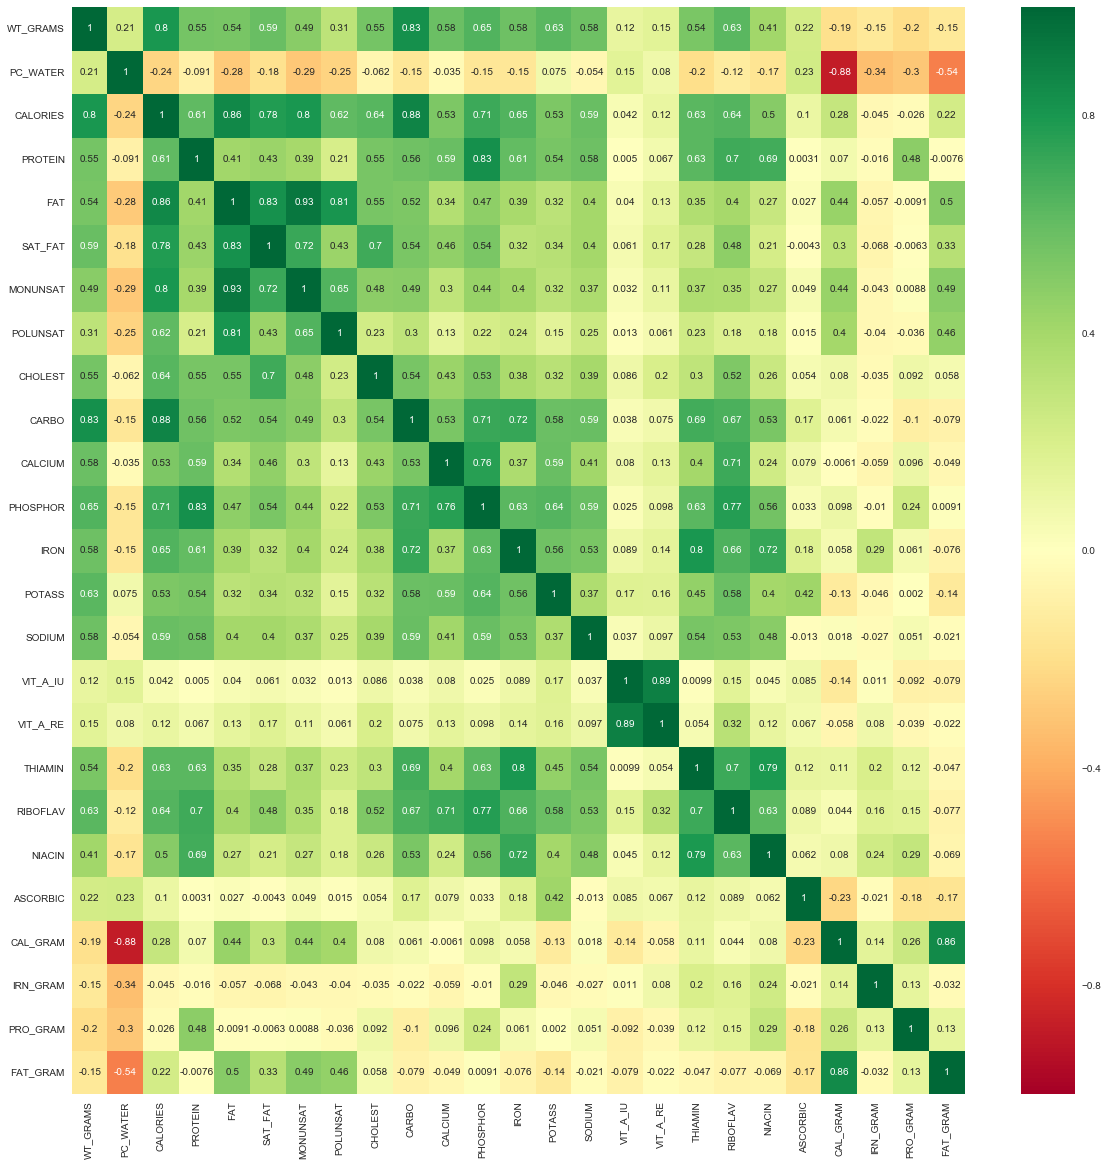

In [62]:
plt.subplots(figsize=(20,20))
sns.heatmap(c, cmap = 'RdYlGn', annot=True)
plt.show();

In [77]:
df1 = df.drop('FOOD', axis=1)

In [78]:
x = df1.drop('CALORIES', axis=1)
y = df1['CALORIES']
x.head()
y.head()

,WT_GRAMS,PC_WATER,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,CALCIUM,...,VIT_A_IU,VIT_A_RE,THIAMIN,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM
0,7.00,13,6,0,0.0,0.0,0.0,0,0,1,...,0,0,0.00,0.00,0.0,0,3.571429,0.000000,0.857143,0.000000
1,28.35,5,16,2,0.8,0.2,0.6,0,7,34,...,160,16,0.67,1.04,3.6,3,2.821869,0.285714,0.564374,0.070547
2,7.00,5,3,0,0.0,0.1,0.0,0,3,3,...,0,0,0.16,0.38,2.6,0,2.857143,0.157143,0.428571,0.000000
3,28.35,18,12,9,5.4,2.5,0.2,22,1,390,...,200,49,0.01,0.11,0.1,0,4.585538,0.010582,0.423280,0.317460
4,100.00,18,42,30,19.1,8.7,0.7,79,4,1376,...,700,173,0.05,0.39,0.3,0,4.550000,0.010000,0.420000,0.300000


0     25
1     80
2     20
3    130
4    455
Name: CALORIES, dtype: int64

In [79]:
train_x, test_x, train_y,test_y = train_test_split(x,y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(720, 24)

(241, 24)

(720,)

(241,)

In [80]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
predict_test = lm.predict(test_x)

In [83]:
print("RSquare Value for TEST data is -")
np.round(lm.score(test_x,test_y)*100,0)
print("RSquare Value for TRAIN data is -")
np.round(lm.score(train_x,train_y)*100,0)

RSquare Value for TEST data is -


100.0

RSquare Value for TRAIN data is -


100.0

In [84]:
import numpy as np
from sklearn import metrics
print("Mean Square Error MSE) for TEST data is")
np.round(metrics.mean_squared_error(test_y, predict_test),0)

Mean Square Error MSE) for TEST data is


372.0

In [85]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error((MAE)for TEST data is")
np.round(mean_absolute_error(test_y,predict_test),0)

Mean Absolute Error((MAE)for TEST data is


9.0

In [87]:
fdf=pd.concat ([test_x,test_y],1)
fdf['Predicted']=np.round(predict_test,1)
fdf['Prediction_error']=fdf['CALORIES']- fdf['Predicted']
fdf

,WT_GRAMS,PC_WATER,PROTEIN,FAT,SAT_FAT,MONUNSAT,POLUNSAT,CHOLEST,CARBO,CALCIUM,...,RIBOFLAV,NIACIN,ASCORBIC,CAL_GRAM,IRN_GRAM,PRO_GRAM,FAT_GRAM,CALORIES,Predicted,Prediction_error
241,454.00,34,43,18,3.8,5.7,5.9,0,230,499,...,1.59,18.2,0,2.797357,0.030837,0.094714,0.039648,1270,1277.9,-7.9
852,85.00,78,0,0,0.0,0.0,0.0,0,18,8,...,0.02,0.3,3,0.823529,0.003529,0.000000,0.000000,70,70.6,-0.6
436,283.00,74,11,9,5.3,2.5,0.3,33,50,413,...,0.55,0.4,0,1.113074,0.001060,0.038869,0.031802,315,322.6,-7.6
386,825.00,20,42,189,28.1,101.5,47.0,569,423,388,...,0.99,6.6,0,4.181818,0.032970,0.050909,0.229091,3450,3457.8,-7.8
345,30.00,22,2,5,1.2,2.4,1.6,32,15,20,...,0.06,0.5,0,4.000000,0.016667,0.066667,0.166667,120,114.9,5.1
311,28.00,32,2,2,0.5,0.8,0.6,0,14,33,...,0.09,1.1,0,3.035714,0.028571,0.071429,0.071429,85,86.1,-1.1
875,372.00,88,0,0,0.0,0.0,0.0,0,46,15,...,0.00,0.0,0,0.483871,0.001075,0.000000,0.000000,180,187.4,-7.4
267,454.00,37,38,18,5.6,6.5,4.2,0,222,572,...,1.41,17.0,0,2.665198,0.028414,0.083700,0.039648,1210,1219.7,-9.7
35,28.35,49,8,5,3.1,1.4,0.1,15,1,207,...,0.10,0.0,0,2.821869,0.003527,0.282187,0.176367,80,81.9,-1.9
78,42.00,72,10,1,0.2,0.2,0.1,17,0,3,...,0.05,3.5,0,1.071429,0.004762,0.238095,0.023810,45,49.9,-4.9


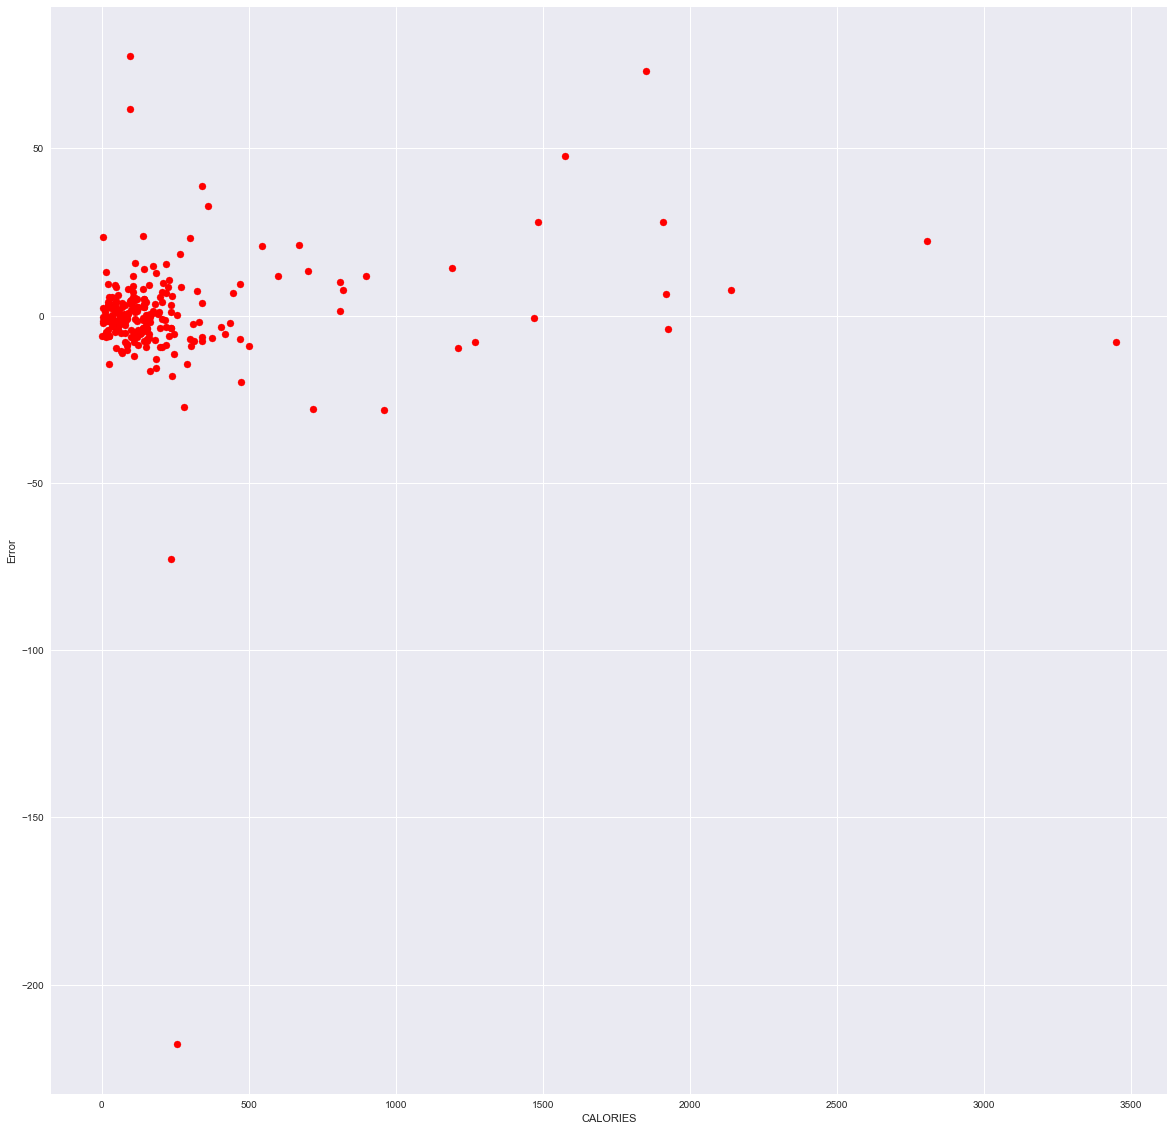

In [88]:
plt.subplots(figsize=(20,20))
plt.scatter(fdf.CALORIES, fdf.Prediction_error, color= 'red')
plt.xlabel('CALORIES')
plt.ylabel('Error')
plt.show();

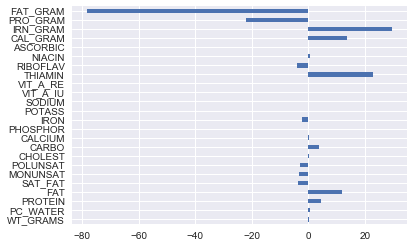

In [89]:
fit_importances=pd.Series(lm.coef_, index = x.columns)
fit_importances.plot(kind= 'barh')
plt.show();